# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [25]:
%matplotlib inline

In [26]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`

First an extra column is added with all values set to 1 for biasing.
Then a array of weights is created with initial values set to 0.

We do gradient descent as follows:

we iterate n_times times, and in each iteration we compute our prediction based on the current weight values.

i,e prediciton = X * W,

based on this prediction we compute the gradient and then shift our weight values towards negative direction of gradient values by rate amount.

after doing this for n_times times we reach to our final weight values and compute the final cost.

Now we can predict values using x_test * W

In [28]:
# # 1.3.1.2
# # implement Linear Regression
class linearRegression:
  def fit(self, x_train, y_train, rate, n_times = 1000):
    x_train = np.c_[x_train, np.ones(len(x_train))]
    self.W = np.mat(np.zeros(x_train.shape[1])).T
    y_train = np.mat(y_train).T
    for i in range(n_times):
      new_y = np.matmul(x_train, self.W)
      gradient = -1*(np.matmul(x_train.T,(y_train-new_y))/len(x_train))
      self.W -= rate*gradient
    self.cost = np.mean(np.square(new_y - y_train))/2

  def predict(self, x_test):
    x_test = np.c_[x_test, np.ones(len(x_test))]
    return np.matmul(x_test, self.W)

In [29]:
# 1.3.2.3
# try with different learning rates and choose the best one
def cost_for_rate(x, y, rate):
  LR = linearRegression()
  LR.fit(x, y, rate = rate, n_times = 1000)
  return LR.cost
MSEs = [cost_for_rate(x_train, y_train, rate) for rate in np.linspace(0.01, 1, 100)]
print(f'Minimum MSE is {min(MSEs)} for learning rate value {(MSEs.index(min(MSEs))+1)*0.01}')

Minimum MSE is 0.0002075197389252464 for learning rate value 1.0


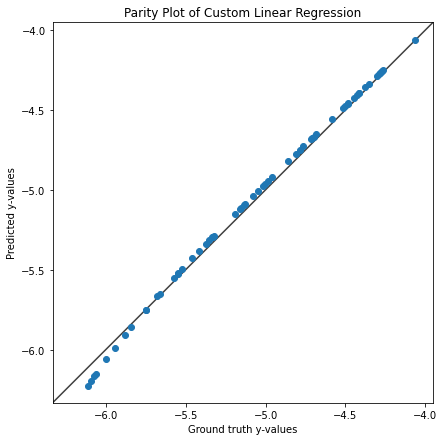

In [30]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`
LR = linearRegression()
LR.fit(x_train, y_train, rate = 0.3)
y_pred = LR.predict(x_test)

y_pred = y_pred.tolist()

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`

Ridge Regression is a type of linear regression that is used to address the issue of multicollinearity in the data. It works by adding a penalty term to the cost function that penalizes large coefficients, effectively shrinking them towards zero. This helps prevent overfitting, which occurs when a model fits the noise in the data. The penalty term in Ridge Regression is L2 regularization, which has a smooth effect on the coefficients and is computationally efficient. 

In [31]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2,0, 1, 5, 10, 20]
rmses=[]
for a in alphas:
    model=Ridge(alpha=a)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=mean_squared_error(y_test, y_pred, squared=False)
    rmses.append(rmse)
df=pd.DataFrame(list(zip(alphas,rmses)),columns=['alpha','RMSE'])
df
# Alpha value represents the amount by which we want to penalize the model to make it more generic

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

,alpha,RMSE
0,1.000000e-15,2.629904e-05
1,1.000000e-10,1.895240e-03
2,1.000000e-08,9.787425e-03
3,1.000000e-04,1.461433e-01
4,1.000000e-03,7.406138e-02
5,1.000000e-02,3.073871e-01
6,0.000000e+00,3.408742e-07
7,1.000000e+00,7.087133e-02
8,5.000000e+00,3.620203e-01
9,1.000000e+01,8.020393e-01


<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

RMSE or Root Mean Squared Error measures the average magnitude of the residuals or error.Here the Alpha value represents the amount by which we want to penalize the model to make it more generic( i.e. underfit).

The value of alpha typically ranges from 0 - infinity. Higher the alpha coefficient, more generic our model. If the alpha value is very less then the model performs similarly to normal linear regression model. From the above table we can see that with decreasing alpha values the model becomes more accurate and RMSE score decreases. This is due to the fact that the particular dataset we are working on is very simple, so overfitting is very unlikely. Thus increasing the alpha values do not increase the RMSE score. In Ridge Regression, we can see that as the values of alpha increases, RMSE also increases, this is because Ridge Regression tends to make the weights of the parameters close to 0 rather than making it absolutely 0.

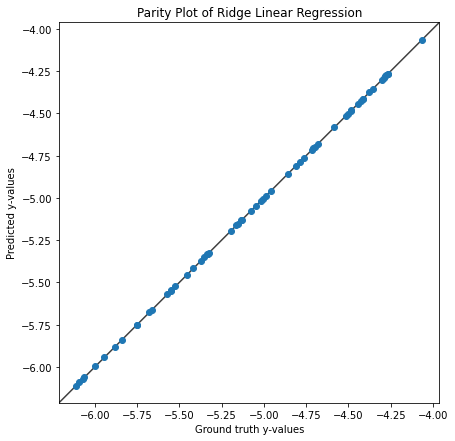

In [32]:
# 1.3.2.4
model=Ridge(alpha=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Ridge Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`
*Lasso regression, also known as the Least Absolute Shrinkage and Selection Operator, is a variation of linear regression that involves L1 regularization. This method involves adding a penalty term equal to the absolute value of the coefficients' magnitude, which can lead to sparse models with a limited number of coefficients. With increased penalties, the coefficient values approach zero, resulting in a simpler model. The Lasso regression technique is useful for reducing the complexity of models by eliminating insignificant coefficients and preserving only the most important features.*

In [33]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Lasso
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
for a in alphas:
  model=Lasso(alpha=a)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  rmse=mean_squared_error(y_test, y_pred, squared=False)
  rmses.append(rmse)
df=pd.DataFrame(list(zip(alphas,rmses)),columns=['alpha','RMSE'])
df

,alpha,RMSE
0,1.000000e-15,2.629904e-05
1,1.000000e-10,1.895240e-03
2,1.000000e-08,9.787425e-03
3,1.000000e-04,1.461433e-01
4,1.000000e-03,7.406138e-02
5,1.000000e-02,3.073871e-01
6,1.000000e+00,3.408742e-07
7,5.000000e+00,7.087133e-02
8,1.000000e+01,3.620203e-01
9,2.000000e+01,8.020393e-01


<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`
RMSE or Root Mean Squared Error measures the average magnitude of the residuals or error.Here the Alpha value represents the amount by which we want to penalize the model to make it more generic( i.e. underfit).

The value of alpha typically ranges from 0 - infinity. Higher the alpha coefficient, more generic our model. If the alpha value is very less then the model performs similarly to normal linear regression model. From the above table we can see that with decreasing alpha values the model becomes more accurate and RMSE score decreases. This is due to the fact that the particular dataset we are working on is very simple, so overfitting is very unlikely. Thus increasing the alpha values do not increase the RMSE score. In Lasso Regression, we can see that as the values of alpha increases, RMSE also increases, this is because Ridge Regression tends to make the weights of the parameters close to 0 rather than making it absolutely 0.

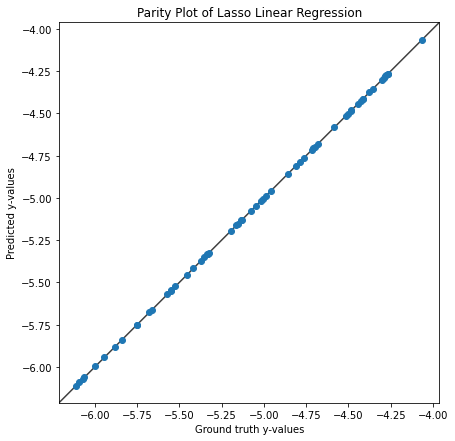

In [34]:
# 1.3.3.4
model=Ridge(alpha=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Lasso Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()